<a href="https://colab.research.google.com/github/IrisFDTD/AI-UNIZAR-course/blob/main/regression/ai_unizar_course_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">*Introducción a la inteligencia artificial: redes neuronales avanzadas con Tensorflow-Keras*</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (sergut@unizar.es)</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

```
Sergio G Rodrigo
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






# **Advanced Neural Networks with TensorFlow-Keras**

---
**Regression with Dense Neural Networks (DNN)**
---
A neural network as a subrogate for the function $y(x)=exp(-x)$, trained in the range $x \in [0,x_{max}]$.

## Main libraries

In [2]:
# Tensorflow Keras and rest of the packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import Adam,SGD

import numpy as np
import matplotlib.pyplot as plt

## Training data

In [3]:
n_train = 20
xmin = 0
xmax = 4

# Definition of the function domain
x_train=np.linspace(xmin,xmax,n_train)

# The real solution y(x) for training evaluation
y_train=tf.exp(-x_train)

# Hyperparameters

In [12]:
# Hiperparameters
epochs = 100
lr=0.001

## Model (version 1)

In [13]:
# Definition of the the model
model_1 = Sequential()
model_1.add(Input(shape=(1,)))
model_1.add(Dense(50, activation='elu'))
model_1.add(Dense(50, activation='elu'))
model_1.add(Dense(1, activation=None))

## Model (version 2)

In [14]:
model_2 = Sequential([Input(shape=(1,)),
                   Dense(50, activation='elu'),
                   Dense(50, activation='elu'),
                   Dense(1, activation=None)])

## Model (version 3): Keras functional application programming interface (API)

In [15]:
input=Input(shape=(1,))
x=Dense(50, activation='elu')(input)
x=Dense(50, activation='elu')(x)
output = Dense(1,activation=None)(x)
model_3=Model(input,output)

# Metrics, optimizer and loss

In [16]:
# Choose the model!!
model=model_3

# Definition of the metrics, optimizer and loss
loss= tf.keras.losses.MeanSquaredError()
metrics=tf.keras.metrics.MeanSquaredError()
optimizer= Adam(learning_rate=lr)

model.compile(loss=loss,
          optimizer=optimizer,
          metrics=[metrics])

# Run the model

In [17]:
model.summary()
history=model.fit(x_train, y_train,batch_size=1,epochs=epochs)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_15 (Dense)            (None, 50)                100       
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2701 (10.55 KB)
Trainable params: 2701 (10.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1359 - mean_squared_error: 0.1359
Epoch 2/100
20/20 [=============================

##  Evolution of losses during training

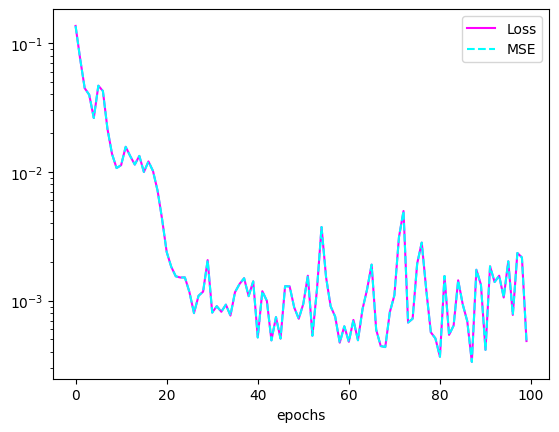

In [21]:
# summarize history for loss and metris
plt.rcParams['figure.dpi'] = 100
plt.plot(history.history['loss'],
         color='magenta',
         label='Loss')
plt.plot(history.history['mean_squared_error'],
         color='cyan',
         label='MSE',linestyle='--')
plt.yscale("log")
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

# Validation: $y(x)$ vs $y_{NN}(x)$

16/16 [==============================] - 0s 957us/step


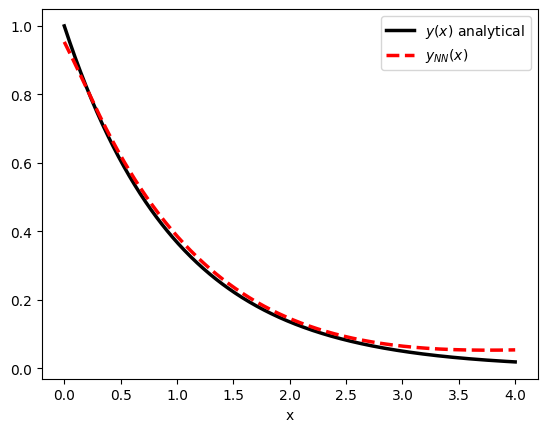

In [19]:
n = 500
x=np.linspace(0,4,n)
y_exact=tf.exp(-x)
y_NN=model.predict(x)

# Plot the results
plt.rcParams['figure.dpi'] = 100
plt.plot(x, y_exact, color="black",linestyle='solid',
                     linewidth=2.5,label="$y(x)$ analytical")
plt.plot(x, y_NN, color="red",linestyle='dashed',
                     linewidth=2.5, label="$y_{NN}(x)$")
plt.legend()
plt.xlabel("x")
plt.show()

# Extract weights and bias: a custom feed-forward model

In [ ]:
# Obtain all model weights and bias
model.weights

In [ ]:
# Let's use Keras functional API: a feed_forward function
def feed_forward(x):
  prediction = []
  for xi in x:
    # Each digit, xi, must be reshaped
    a=np.array([[xi]])
    # For each layer in model we use the layer properties to
    # feedforward
    for layer in model.layers[0:]:
       #print("Layer %s" %(layer.name))
       w=layer.kernel
       b=layer.bias
       #print(a.shape,w.shape,b.shape)
       z=a@w+b
       a=layer.activation(z)
    prediction.append(a)
  return prediction

# feed_forward in pythonic style
def feed_forward_pythonic(x):
  a=np.reshape(x,(x.shape[0],1))
  print(a.shape)
  for layer in model.layers[0:]:
      w,b=layer.kernel,layer.bias
      a=layer.activation(a@w+b)
  return a

(500, 1)


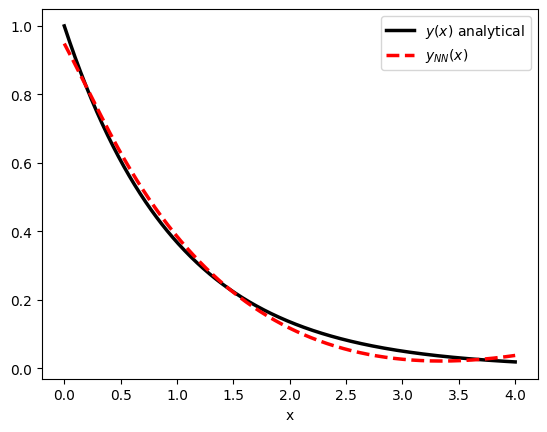

In [ ]:
n = 500
x=np.linspace(0,4,n)
y_exact=tf.exp(-x)
y_NN=feed_forward_pythonic(x)
y_NN=np.squeeze(y_NN) # Remove trivial dimensions

# Plot the results
plt.rcParams['figure.dpi'] = 100
plt.plot(x, y_exact, color="black",linestyle='solid',
                     linewidth=2.5,label="$y(x)$ analytical")
plt.plot(x, y_NN, color="red",linestyle='dashed',
                     linewidth=2.5, label="$y_{NN}(x)$")
plt.legend()
plt.xlabel("x")
plt.show()